In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler



In [3]:
df = pd.read_csv("Employee.csv")
df.head()


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


Data Exploration:Explore the data, list down the unique values in each feature and find its length. Perform the statistical analysis and renaming of the columns. 

In [6]:
for column in df.columns:
    print(f"{column} - Unique Values: {df[column].unique()}")
    print(f"Length of unique values: {len(df[column].unique())}")


Company - Unique Values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Length of unique values: 7
Age - Unique Values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Length of unique values: 30
Salary - Unique Values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Length of unique values: 41
Place - Unique Values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Length of unique values: 12
Country - Unique Values: ['India']
Length of unique values: 1
Gender - Unique Values: [0 1]
Length of unique values: 2


In [7]:
df.describe(include='all') 


,Company,Age,Salary,Place,Country,Gender
count,140,130.000000,124.000000,134,148,148.000000
unique,6,NaN,NaN,11,1,NaN
top,TCS,NaN,NaN,Mumbai,India,NaN
freq,53,NaN,NaN,37,148,NaN
mean,NaN,30.484615,5312.467742,NaN,NaN,0.222973
std,NaN,11.096640,2573.764683,NaN,NaN,0.417654
min,NaN,0.000000,1089.000000,NaN,NaN,0.000000
25%,NaN,22.000000,3030.000000,NaN,NaN,0.000000
50%,NaN,32.500000,5000.000000,NaN,NaN,0.000000
75%,NaN,37.750000,8000.000000,NaN,NaN,0.000000


In [8]:
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
df.columns


Index(['company', 'age', 'salary', 'place', 'country', 'gender'], dtype='object')

Data Cleaning:Find the missing and inappropriate values, treat them appropriately. Remove all duplicate rows. Find the outliers. Replace the value 0 in age as NaN Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode) 

In [9]:
df.isnull().sum()


company     8
age        18
salary     24
place      14
country     0
gender      0
dtype: int64

In [10]:
df['age'] = df['age'].replace(0, np.nan)


In [12]:
df = df.drop_duplicates()


In [14]:
# Replace 0 in age with NaN
df['age'] = df['age'].replace(0, np.nan)

# Fill missing values in 'age' with median
df['age'] = df['age'].fillna(df['age'].median())

# Fill missing values in categorical columns with mode
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])


In [15]:
def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)]

outliers_age = detect_outliers('age')
outliers_salary = detect_outliers('salary')
print(f"Outliers in Age: {len(outliers_age)}")
print(f"Outliers in Salary: {len(outliers_salary)}")


Outliers in Age: 0
Outliers in Salary: 0


Data Analysis:Filter the data with age >40 and salary<5000 Plot the chart with age and salary Count the number of people from each place and represent it visually 

In [16]:
filtered_df = df[(df['age'] > 40) & (df['salary'] < 5000)]
filtered_df.head()


,company,age,salary,place,country,gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0


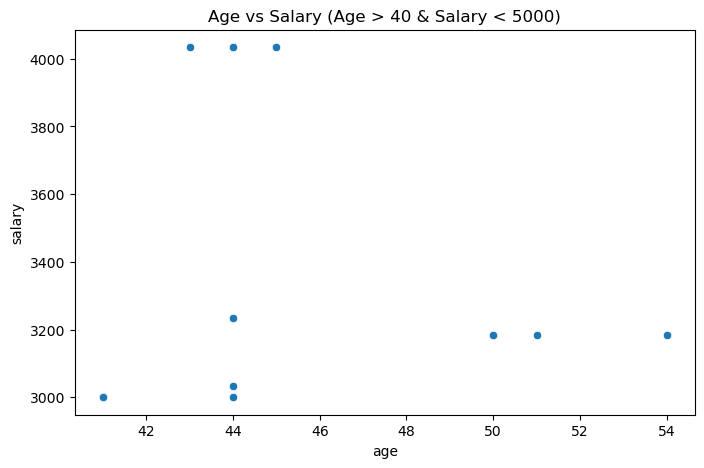

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=filtered_df, x='age', y='salary')
plt.title("Age vs Salary (Age > 40 & Salary < 5000)")
plt.show()


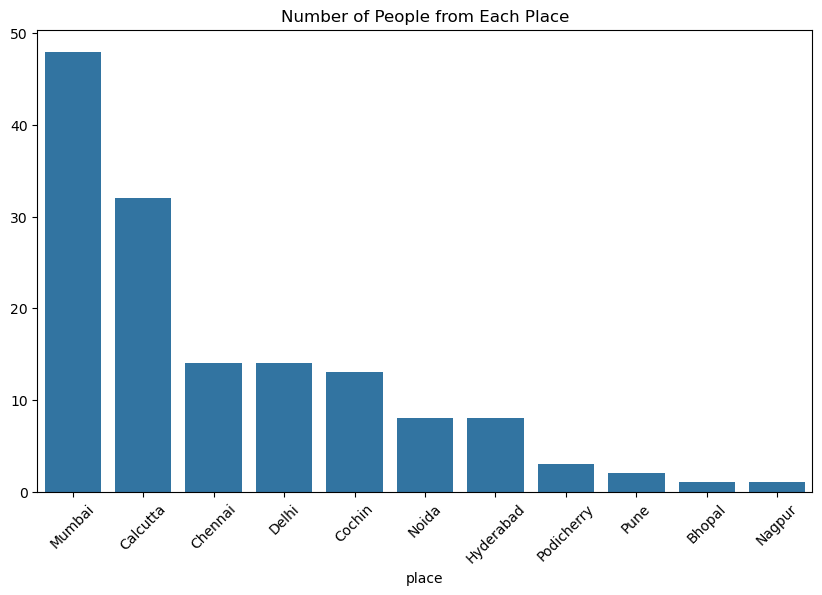

In [18]:
place_count = df['place'].value_counts()

# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=place_count.index, y=place_count.values)
plt.title("Number of People from Each Place")
plt.xticks(rotation=45)
plt.show()


Data Encoding:Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms. 

In [19]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])  # Example


In [20]:
df = pd.get_dummies(df, columns=['place'], drop_first=True)


Feature Scaling:After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler. 

In [21]:
scaler_standard = StandardScaler()
scaled_standard = scaler_standard.fit_transform(df[['age', 'salary']])
df[['age_scaled_std', 'salary_scaled_std']] = scaled_standard


In [22]:
scaler_minmax = MinMaxScaler()
scaled_minmax = scaler_minmax.fit_transform(df[['age', 'salary']])
df[['age_scaled_minmax', 'salary_scaled_minmax']] = scaled_minmax


In [23]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   company               144 non-null    object 
 1   age                   144 non-null    float64
 2   salary                121 non-null    float64
 3   country               144 non-null    object 
 4   gender                144 non-null    int64  
 5   place_Calcutta        144 non-null    bool   
 6   place_Chennai         144 non-null    bool   
 7   place_Cochin          144 non-null    bool   
 8   place_Delhi           144 non-null    bool   
 9   place_Hyderabad       144 non-null    bool   
 10  place_Mumbai          144 non-null    bool   
 11  place_Nagpur          144 non-null    bool   
 12  place_Noida           144 non-null    bool   
 13  place_Podicherry      144 non-null    bool   
 14  place_Pune            144 non-null    bool   
 15  age_scaled_std        144 no

In [24]:
df.to_csv("cleaned_preprocessed_data.csv", index=False)
